In [2]:
from __future__ import print_function
import pickle
import h5py

class WeightsUtils:
    
    def __init__(self, source):
        self.source = source
        
    def extract_weights(self, file, debug=False):
        f = h5py.File(file)
        d = {}
        try:
            layer_count = 1
            for layer, g in f.items():
                for p_name in g.keys():
                    param = g[p_name]
                    for k_name in param.keys():
                        ls = []
                        for i in param.get(k_name):
                            ls.append(i)
                        if debug: print("      {}/{}: {} x {}".format(p_name, k_name, len(ls), len(ls[0]) if k_name.startswith('kernel') else 0))
                        label = k_name.split(':')[0]
                        d['layer_{}_{}'.format(label, layer_count)] = ls
                    layer_count += 1
        finally:
            f.close()

        return d
    
    def get_weights(self):
        if isinstance(self.source, str):
            weights_dict = self.extract_weights(self.source)

            w, b = [], []
            for k, v in weights_dict.items():
                if k.startswith('layer_kernel'): w.append(v)
                else: b.append(v)
                
            return [i for i in zip(w, b)]
        
        else:
            w = self.source.get_weights()
            return [i for i in zip(*[iter(w)] * 2)]

In [3]:
W = WeightsUtils('nn_weights.h5')

w = W.get_weights()

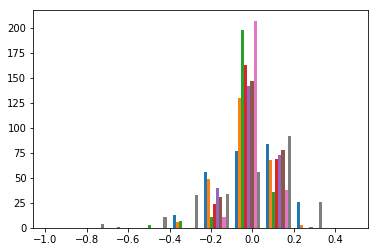

In [43]:
import matplotlib.pyplot as plt
plt.hist(w[0][0], range=[-1, .5])
    
plt.show()

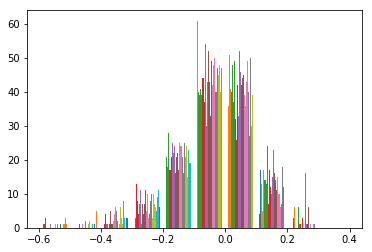

In [47]:
plt.hist(w[1][0], range=[-.6, .4])
    
    
plt.show()

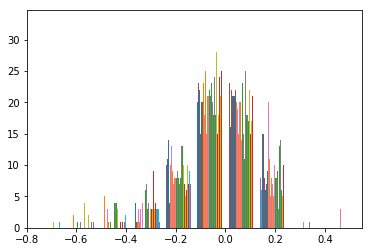

In [49]:
plt.hist(w[2][0], range=[-.75, .5])
    
    
plt.show()